## Business Case :

* 1.Airline: The airline operating the flight (e.g., IndiGo, Air India, Jet Airways).

* 2.Date_of_Journey: The date on which the journey is scheduled to take place.

* 3.Source: The departure city or airport (e.g., Banglore, Kolkata, Delhi).

* 4.Destination: The arrival city or airport (e.g., New Delhi, Banglore, Cochin).

* 5.Route: The sequence of airports the flight travels through from the source to the destination. For example, "BLR → DEL" indicates a direct route from Banglore (BLR) to New Delhi (DEL), while "CCU → IXR → BBI → BLR" indicates a flight from Kolkata (CCU) to Banglore (BLR) with stops at Ranchi (IXR) and Bhubaneswar (BBI).

* 6.Dep_Time: The departure time of the flight.

* 7.Arrival_Time: The arrival time of the flight at the destination.

* 8.Duration: The total time taken for the flight from departure to arrival.

* 9.Total_Stops: The number of stops between the source and destination. It could be "non-stop," "1 stop," "2 stops," etc.

* 10.Additional_Info: Additional information about the flight, such as special remarks or "No info" if there isn't any.

* 11.Price: The fare for the flight in the local currency.

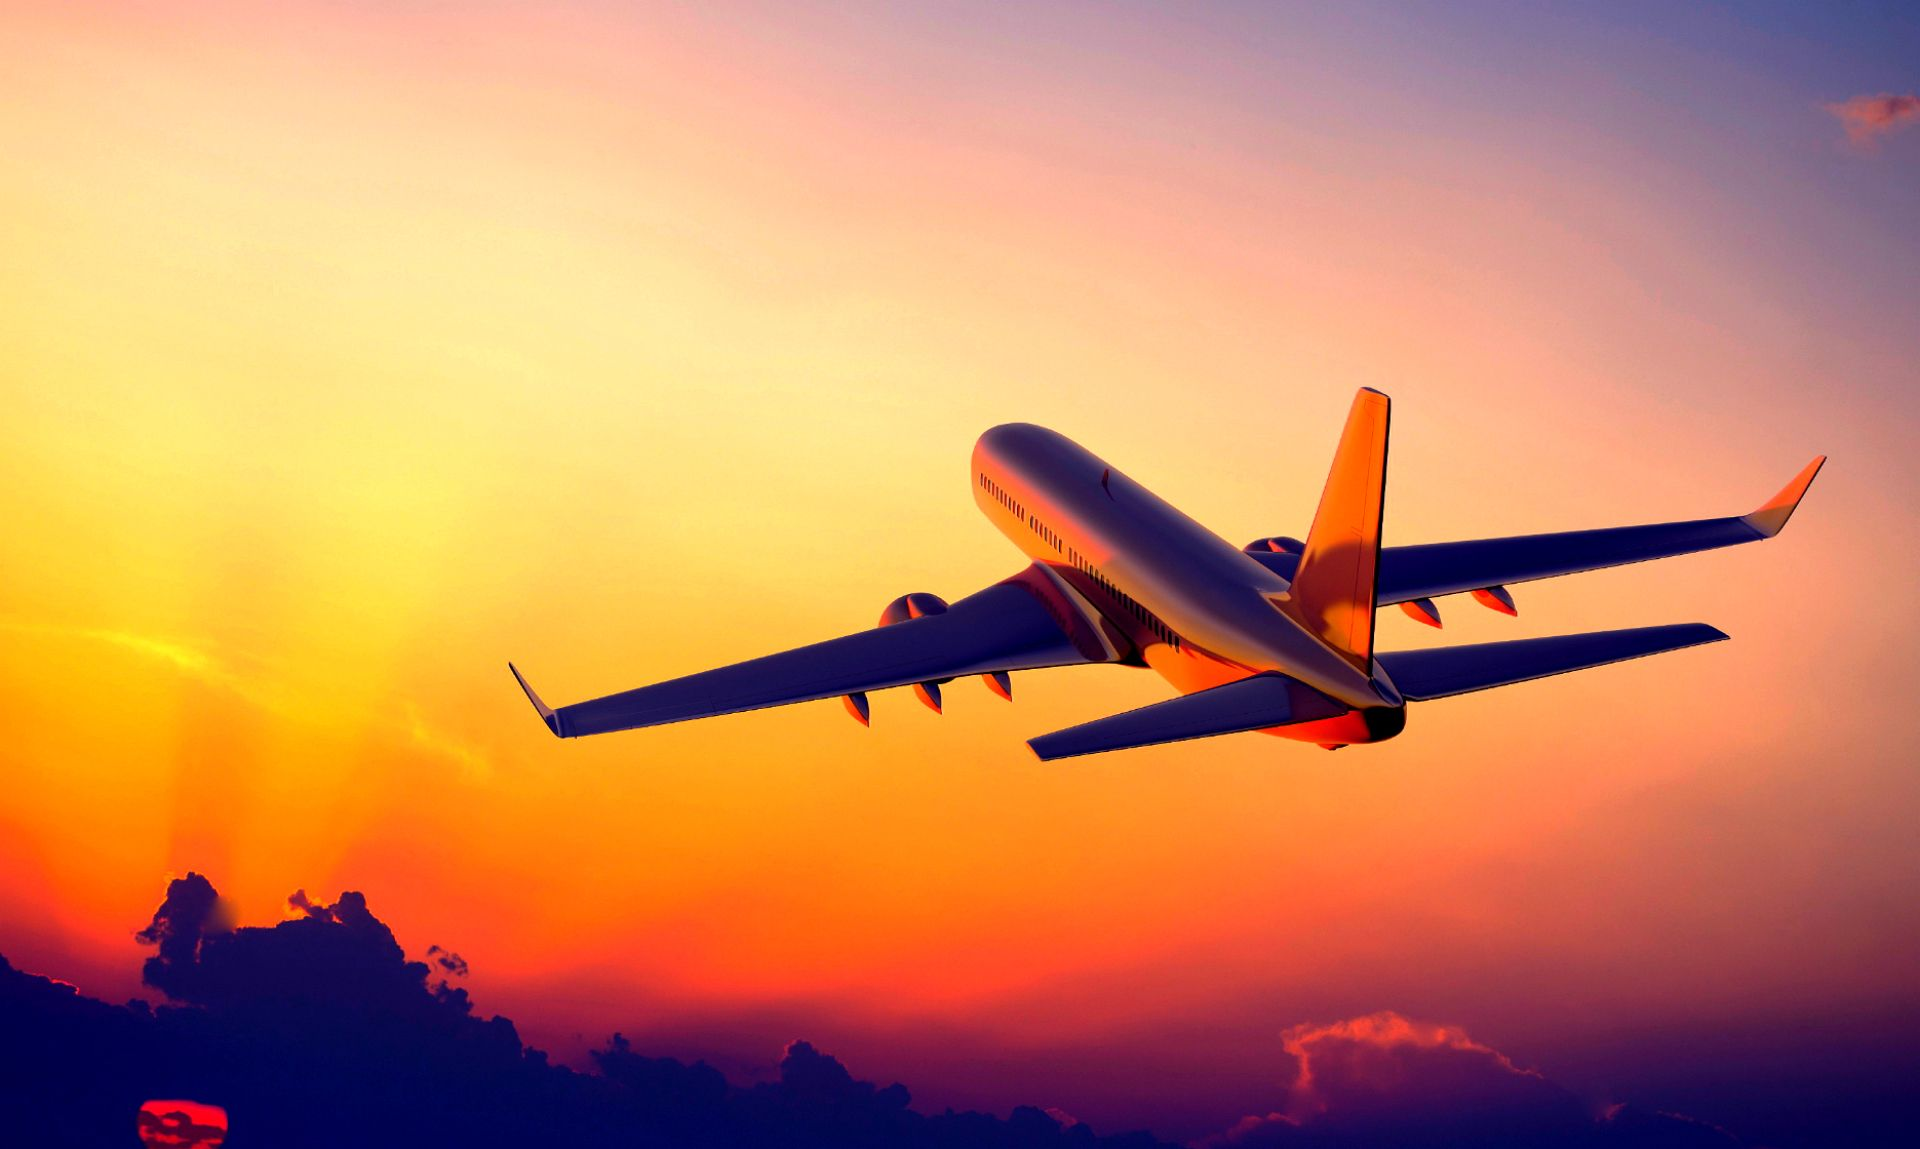

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('Flight_Fare.csv')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## Basic Check :

In [3]:
df.shape

(10683, 11)

In [4]:
df.size

117513

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [9]:
np.where(df.Route.isnull())

(array([9039], dtype=int64),)

In [10]:
null_counts=df['Total_Stops'].isnull().sum()

In [11]:
null_counts

1

In [12]:
df.isnull().sum().sum()

2

## EXPOLATORY DATA ANALYSIS (EDA) :

In [13]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
df.loc[df.Price==df.Price.max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [15]:
df.loc[(df.Airline=='Jet Airways Business') & (df.Price==df.Price.max())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [16]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [18]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [19]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [20]:
df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [21]:
df.Price.unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [22]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
df.Price.value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: count, Length: 1870, dtype: int64

In [25]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [26]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [27]:
df[df.Additional_Info=='In-flight meal not included']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
13,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663
17,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,14:00,12:35 13 Jun,22h 35m,1 stop,In-flight meal not included,10262
19,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,16:00,12:35 28 May,20h 35m,1 stop,In-flight meal not included,12898
...,...,...,...,...,...,...,...,...,...,...,...
10663,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733
10666,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262
10667,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [28]:
df[df.Additional_Info=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [29]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [30]:
df.loc[df.Price==79512]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [31]:
df.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [32]:
df.loc[df.Duration=='3h 25m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8478,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,13:30,16:55,3h 25m,2 stops,No info,18797


In [33]:
df.loc[df.Duration=='42h 5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5953,Jet Airways,21/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,10:20,04:25 23 Mar,42h 5m,2 stops,No info,11664


In [34]:
df.loc[df.Duration==df.Duration.max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
212,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646
1435,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,6916
1494,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,6076
1505,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646
1868,Air India,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8891
1873,Air India,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8576
2123,Air India,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8576
2219,Air India,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8366
2836,Air India,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8891
3274,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646


In [35]:
df.loc[df.Price==df.Price.max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [36]:
df.Duration.max()

'9h 5m'

In [37]:
max=df['Duration'].max()
max

'9h 5m'

In [38]:
df.loc[df['Duration']==max]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
212,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646
1435,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,6916
1494,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,6076
1505,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646
1868,Air India,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8891
1873,Air India,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8576
2123,Air India,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8576
2219,Air India,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8366
2836,Air India,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,18:30,9h 5m,1 stop,No info,8891
3274,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646


In [39]:
df.duplicated().value_counts()

False    10463
True       220
Name: count, dtype: int64

In [40]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [41]:
df.loc[df.duplicated(df[['Price']])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
30,Vistara,18/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
42,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,20:55,19:00 19 May,22h 5m,1 stop,In-flight meal not included,12373
46,IndiGo,27/05/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
47,Air India,3/05/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229


In [43]:
df.duplicated().value_counts()

False    10463
True       220
Name: count, dtype: int64

In [44]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [45]:
len(df.columns)

11

In [46]:
df.loc[df.Route.isnull(),'Route']=df.Route.mode()[0]

In [47]:
df.loc[df.Total_Stops.isnull(),'Total_Stops']=df.Total_Stops.mode()[0]

In [48]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Visulaize the columns :

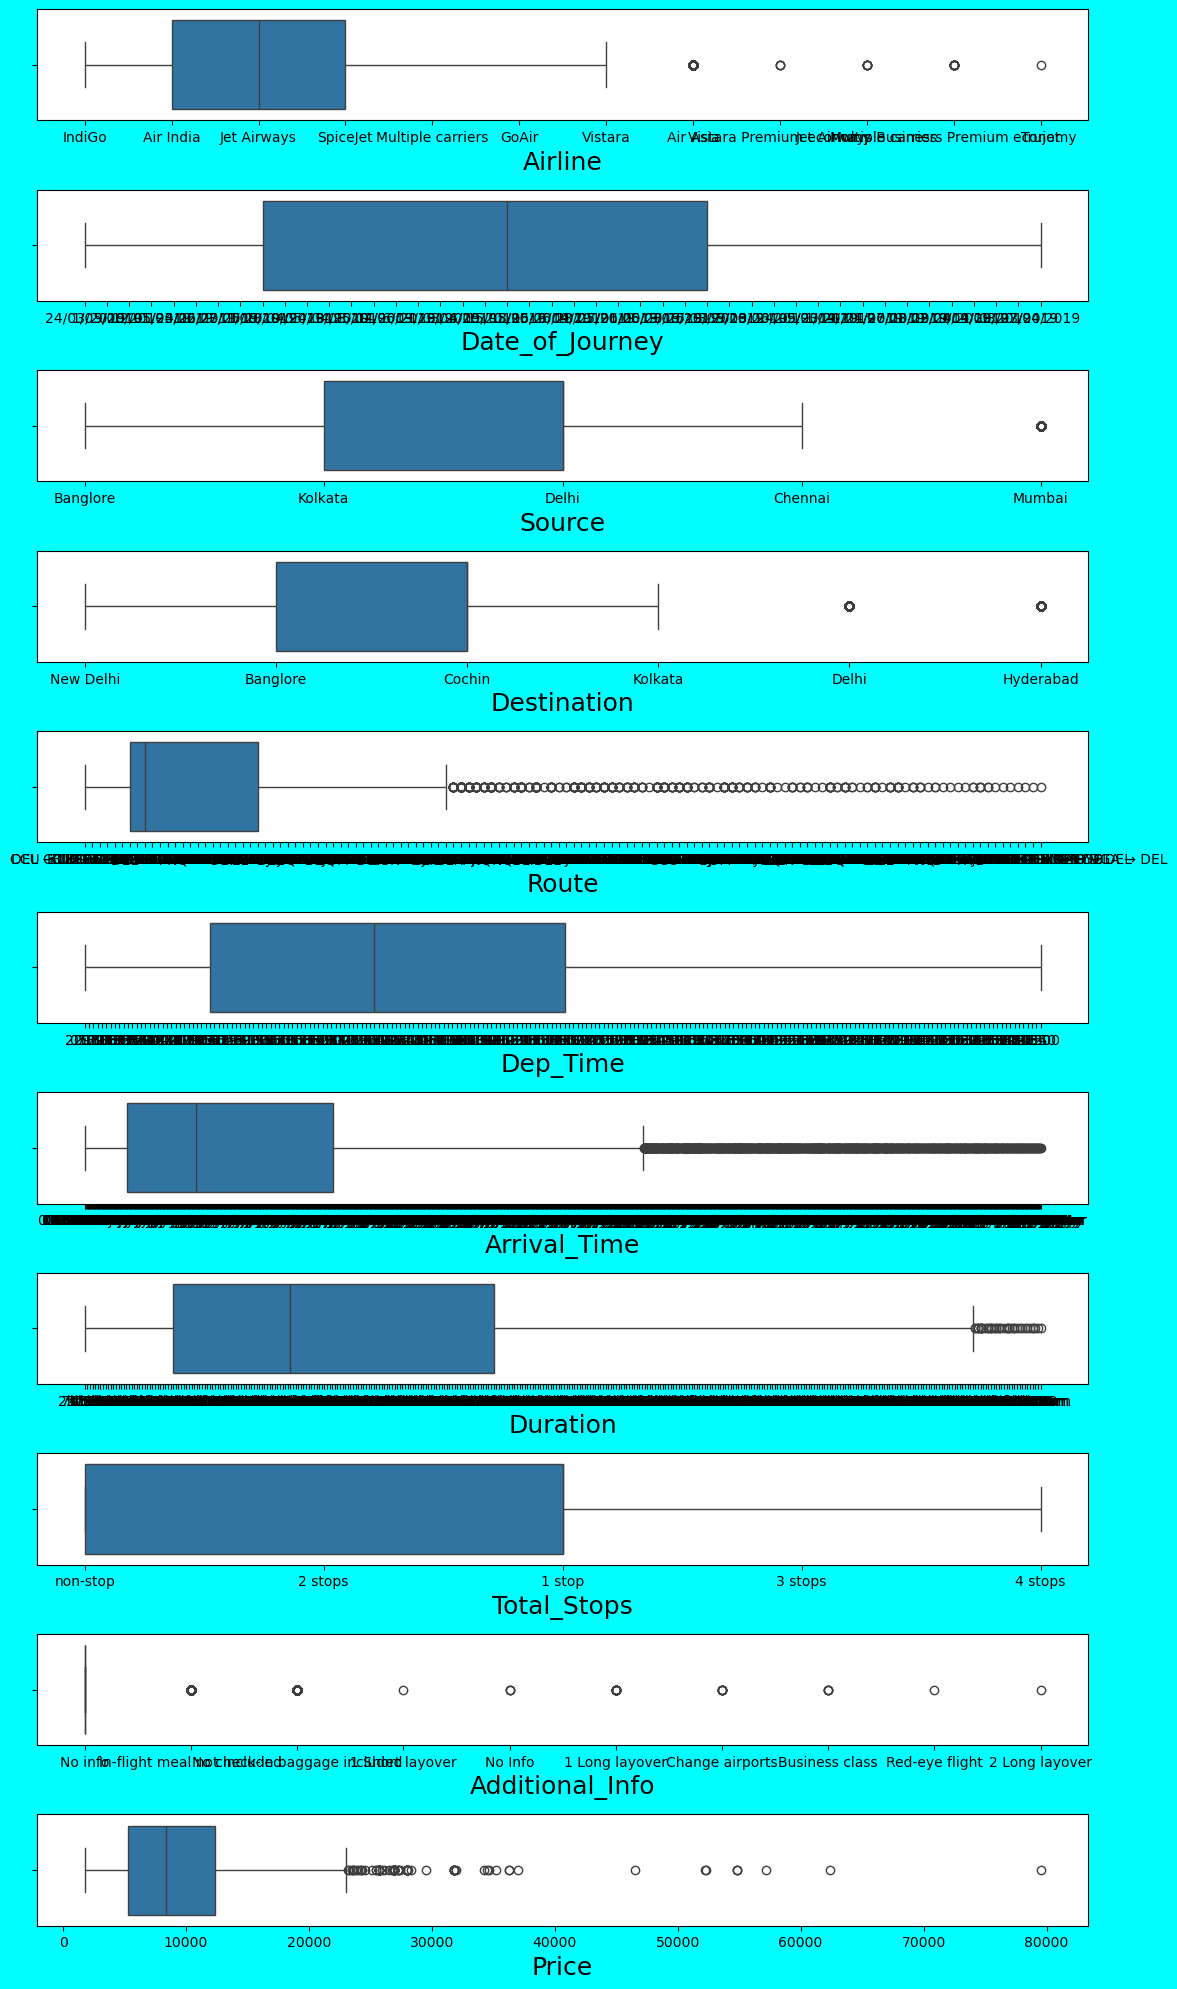

In [135]:
plt.figure(figsize=(12,20),facecolor='cyan')
plotnumber=1
for i in df:
    plt.subplot(11,1,plotnumber)
    sns.boxplot(x=i,data=df)
    plt.xlabel(i,fontsize=18)
    plotnumber+=1
plt.tight_layout()

## Domain Analysis :
* In this datasets no outliers. 

In [49]:
df.loc[df.Additional_Info=='2 Long layover','Additional_Info'].value_counts()

Additional_Info
2 Long layover    1
Name: count, dtype: int64

In [50]:
df.loc[df.Additional_Info=='Red-eye flight','Additional_Info'].value_counts()

Additional_Info
Red-eye flight    1
Name: count, dtype: int64

In [51]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [52]:
df.loc[df.Price>60000,'Price'].value_counts()

Price
79512    1
62427    1
Name: count, dtype: int64

In [53]:
df.loc[df.Destination=='Delhi','Destination'].value_counts()

Destination
Delhi    1265
Name: count, dtype: int64

In [54]:
df.loc[df.Destination=='Hyderabad','Destination'].value_counts()

Destination
Hyderabad    697
Name: count, dtype: int64

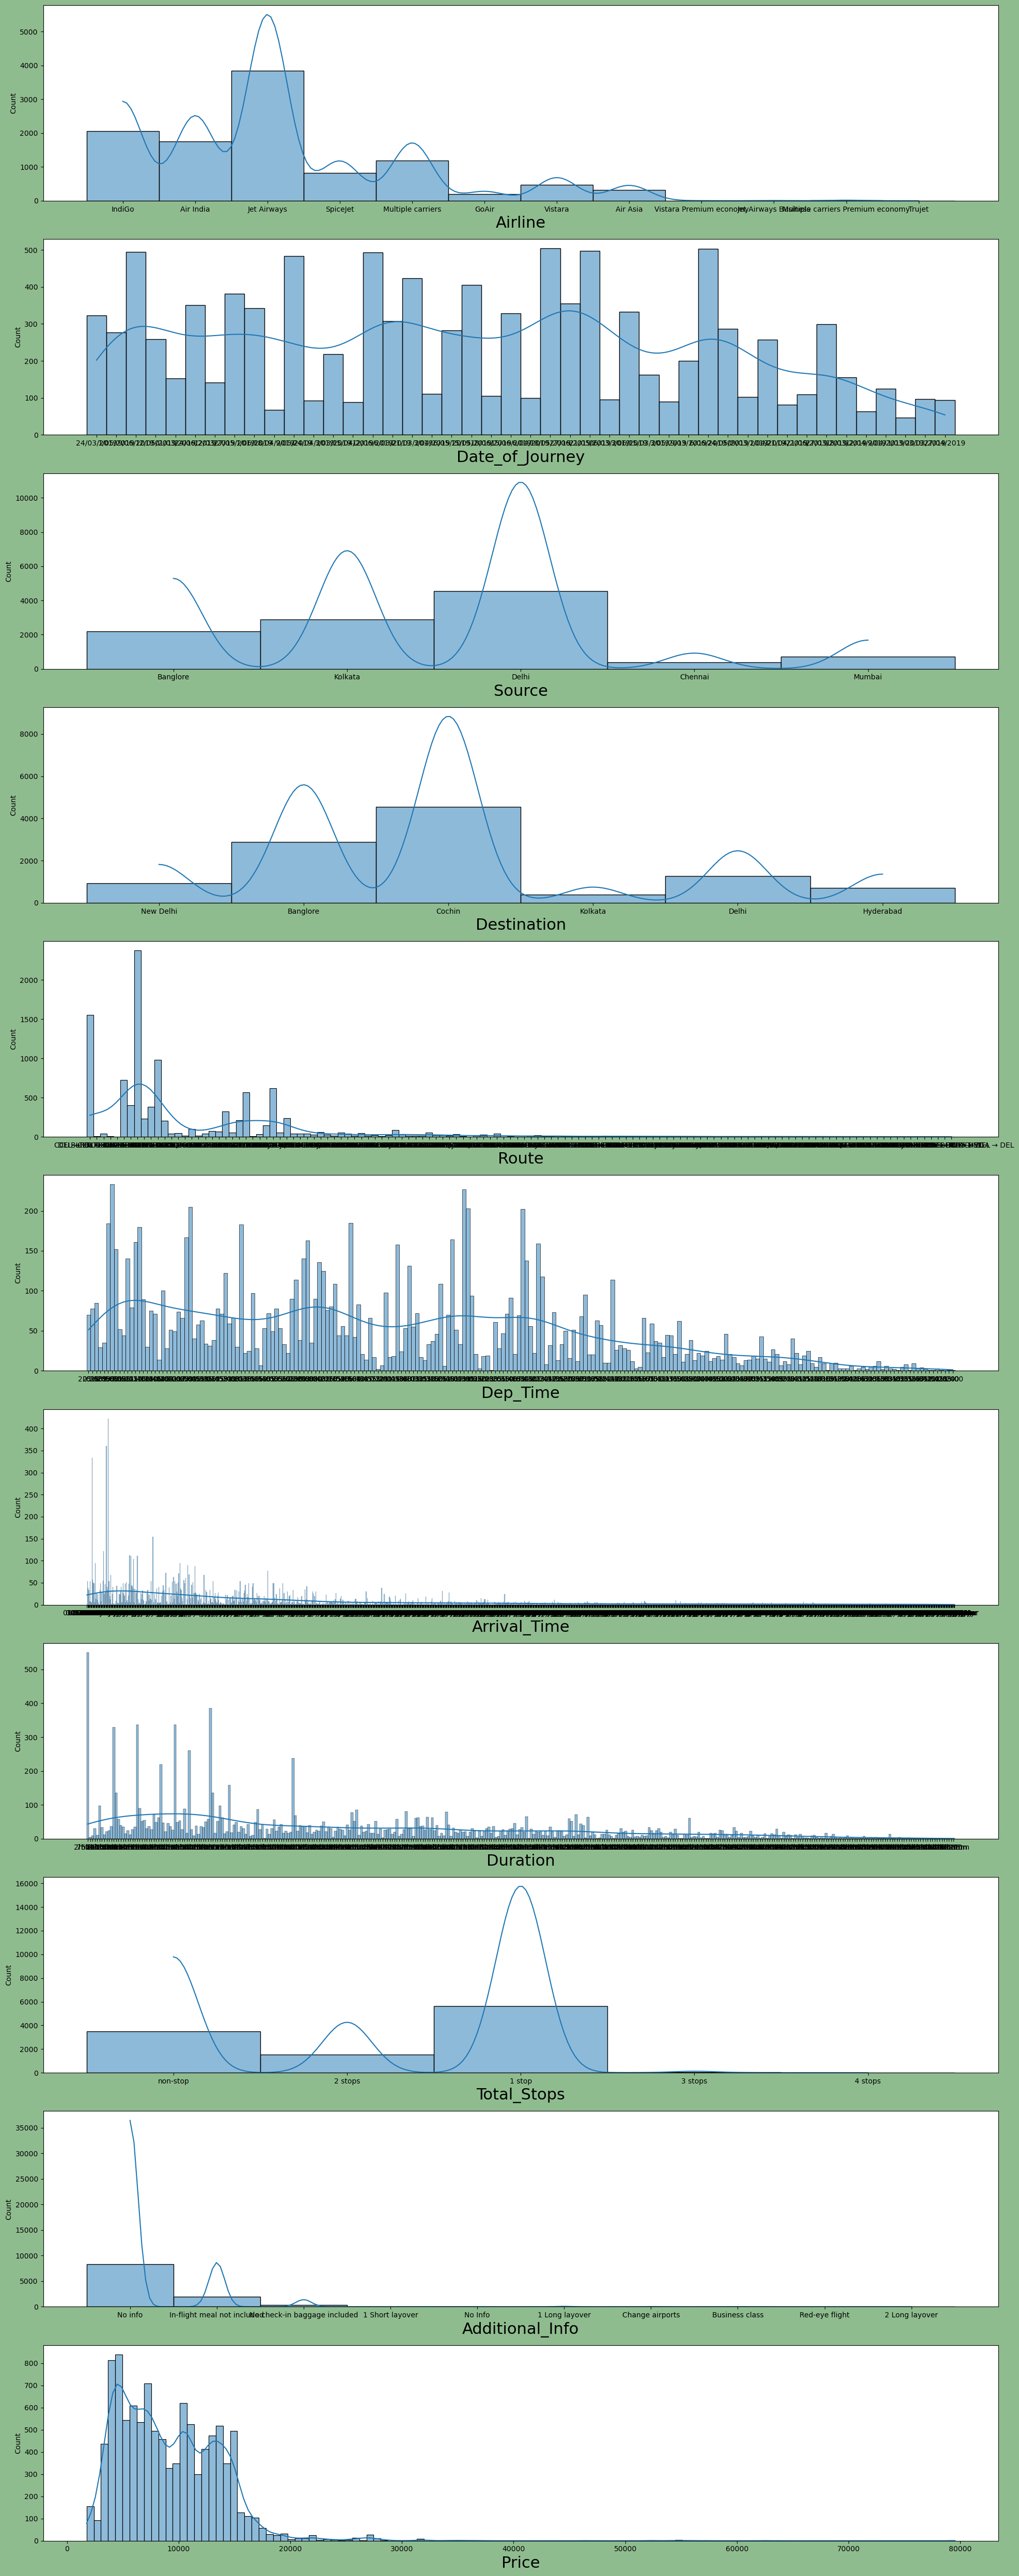

In [142]:
plt.figure(figsize=(20,50),facecolor='darkseagreen')
plotnumber=1
for i in df:
    plt.subplot(11,1,plotnumber)
    sns.histplot(x=i,data=df,kde=True)
    plt.xlabel(i,fontsize=22)
    plotnumber+=1
plt.tight_layout()

In [55]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<Axes: xlabel='Destination', ylabel='Price'>

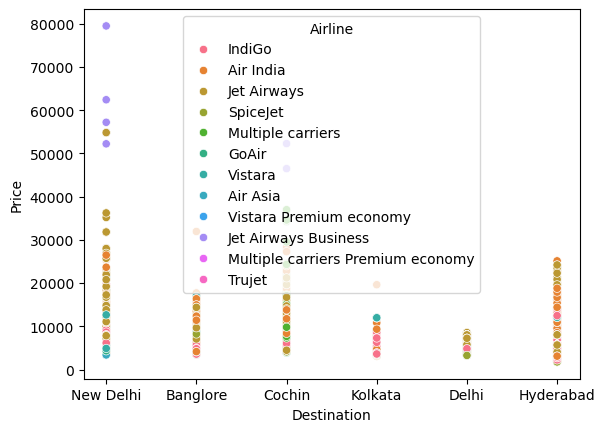

In [144]:
sns.scatterplot(x='Destination',y='Price',hue='Airline',data=df)

## Domain Analysis :
* Jet Airways Business is highest Price in the datasets.

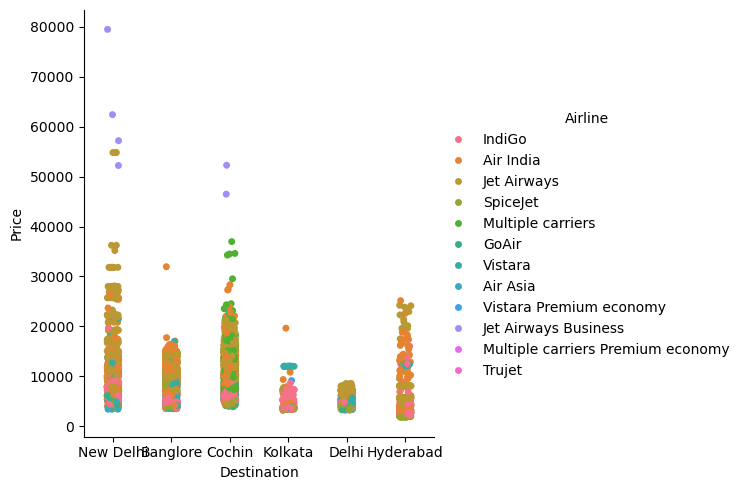

In [145]:
sns.catplot(x='Destination',y='Price',hue='Airline',data=df)

Text(0, 0.5, 'Price')

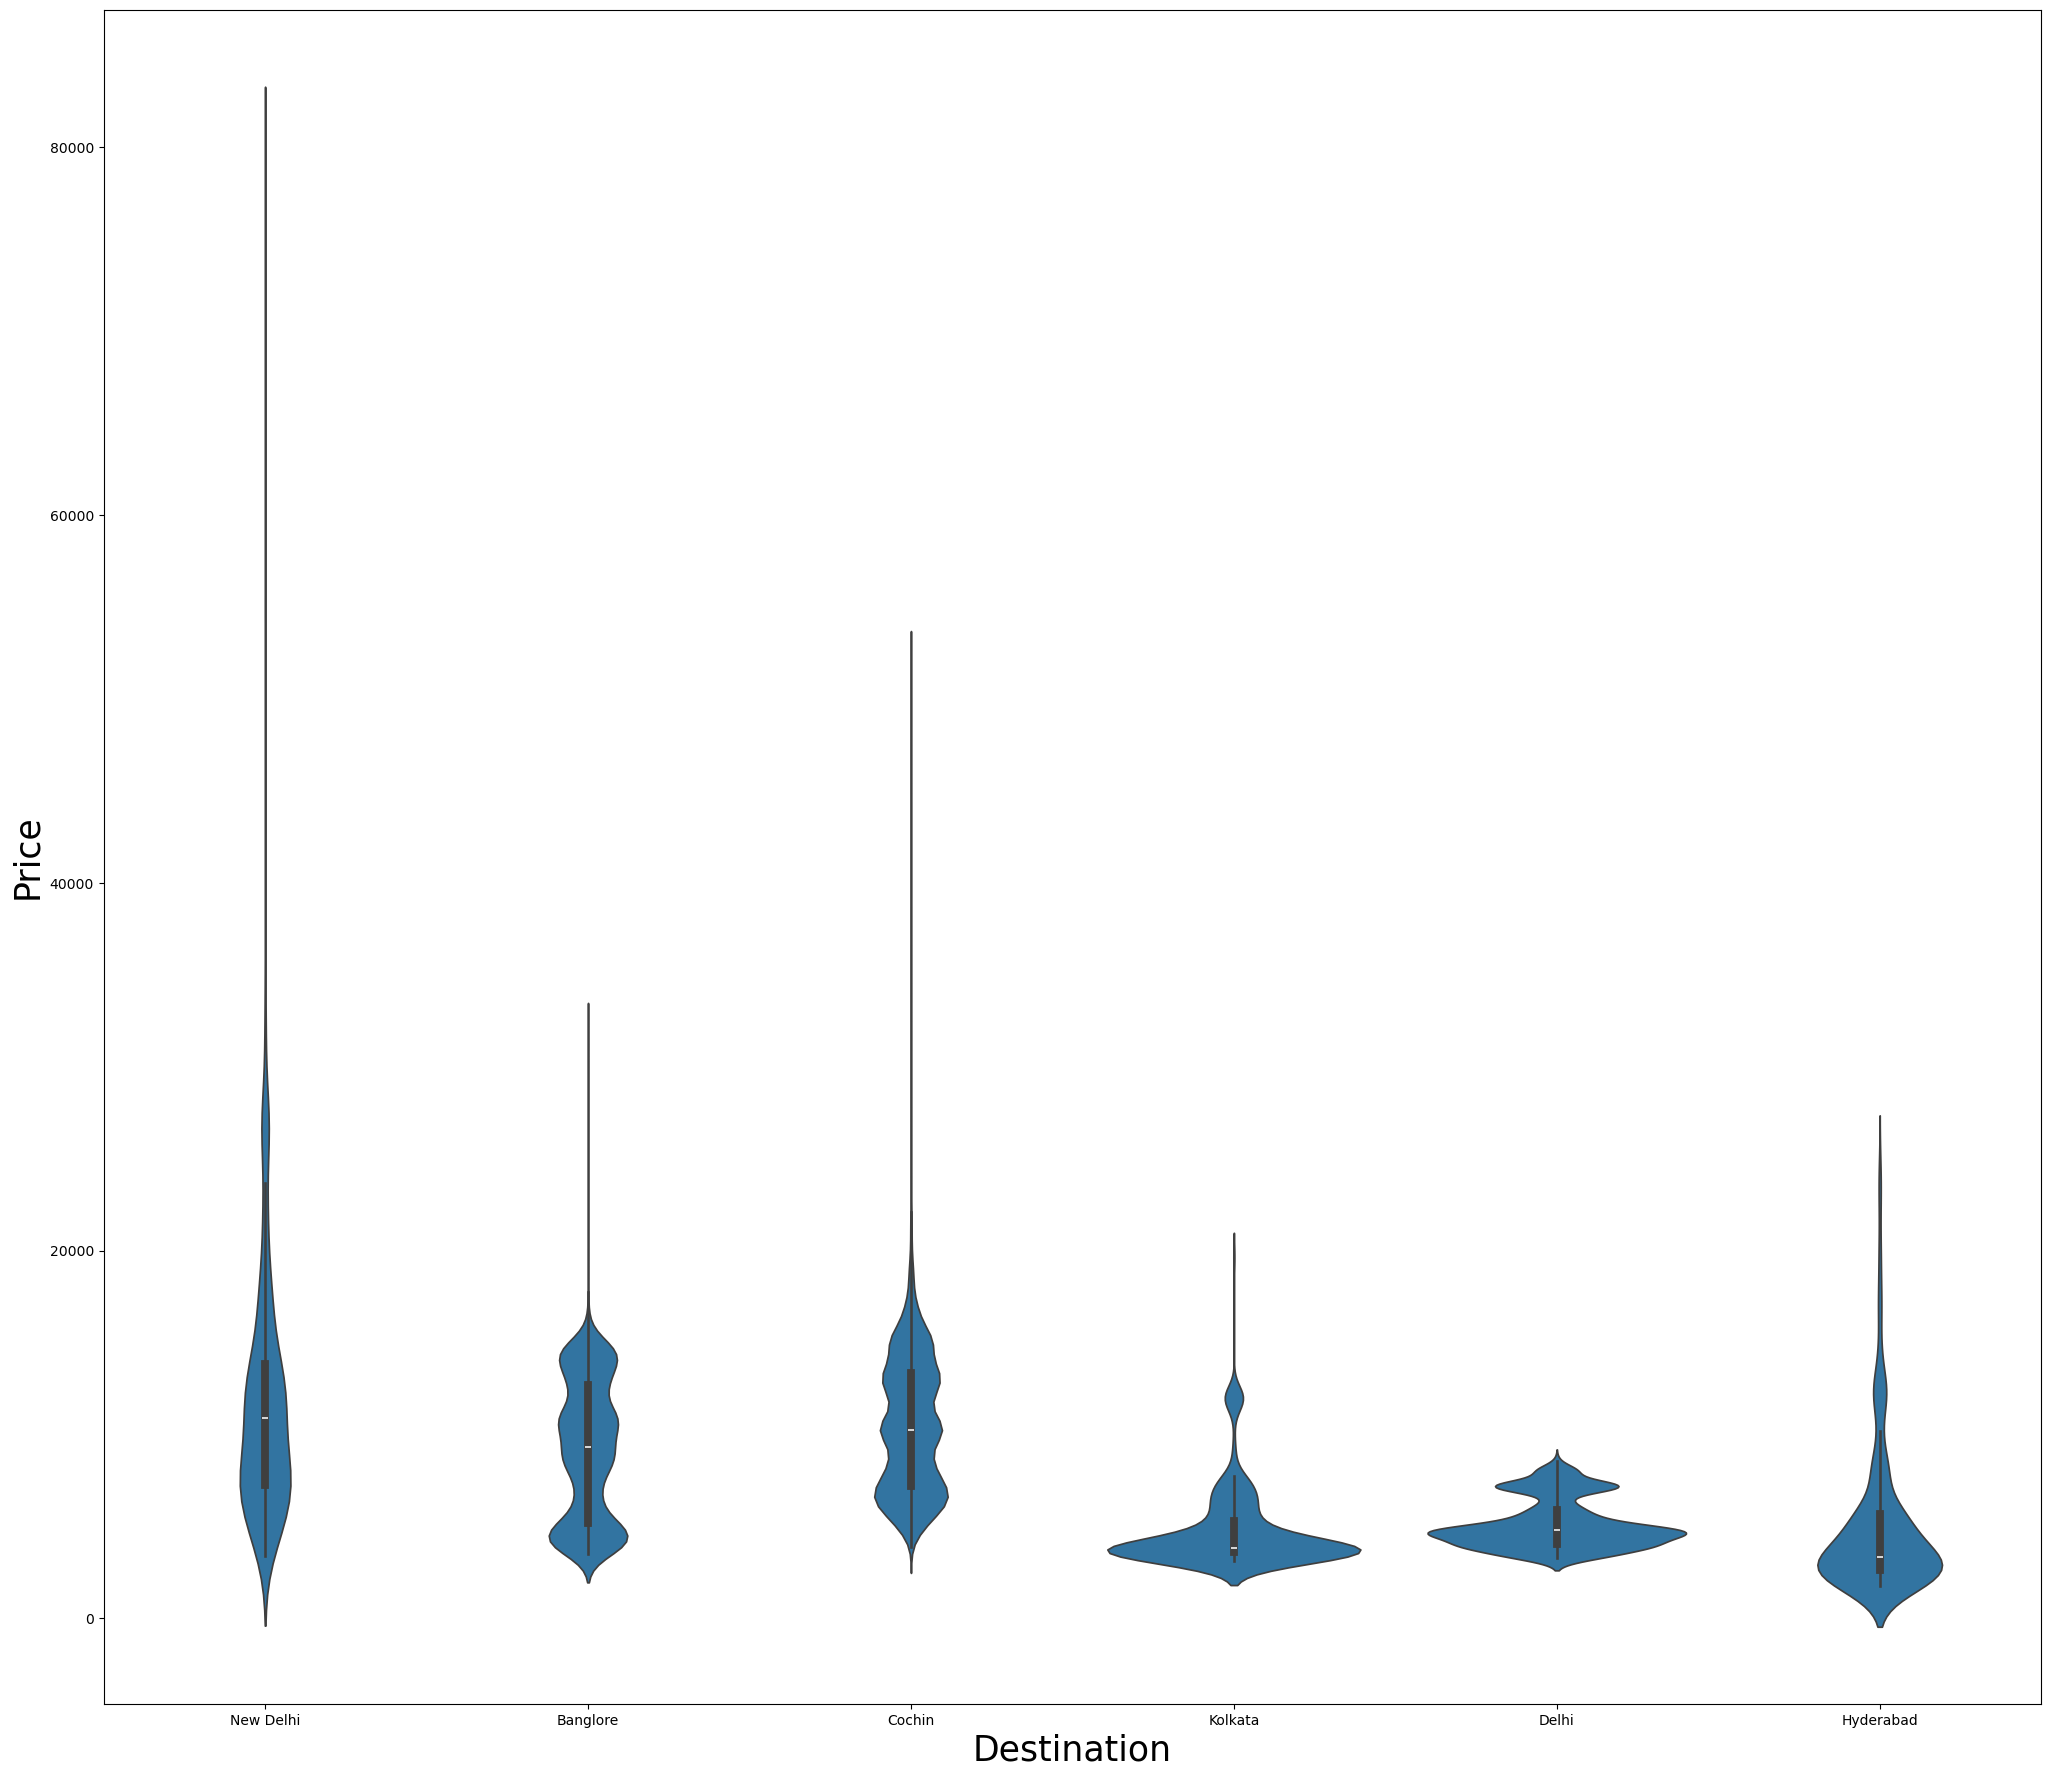

In [146]:
plt.figure(figsize=(25,22))
sns.violinplot(x='Destination',y='Price',data=df)
plt.xlabel('Destination',fontsize=25)
plt.ylabel('Price',fontsize=25)

## Domain Analysis :
* Jet Airways Business Price highest whiskers in the datasets.  

In [57]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Text(0, 0.5, 'Price')

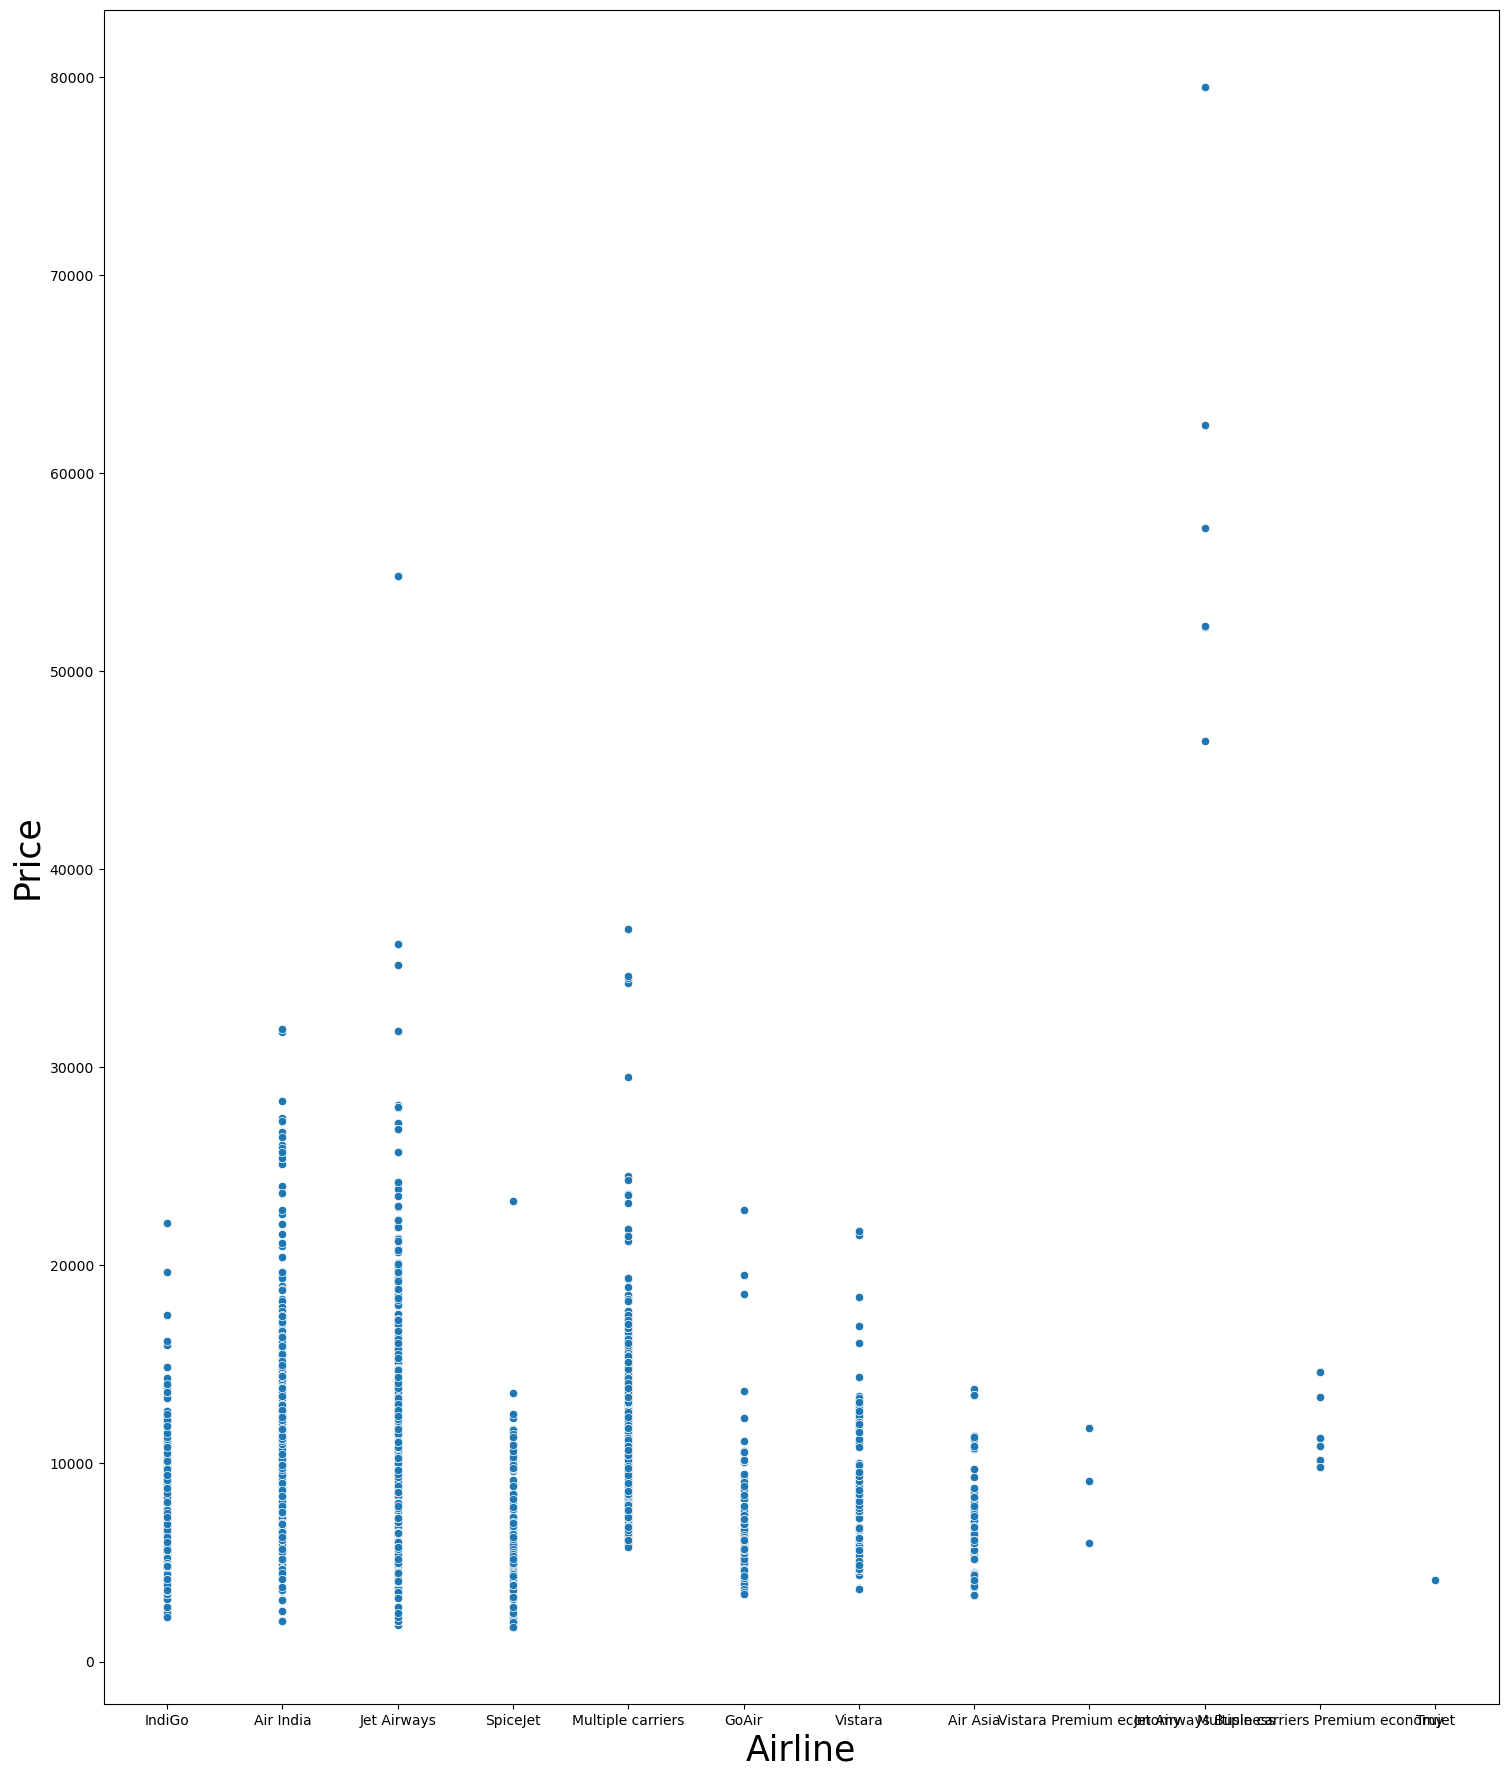

In [148]:
plt.figure(figsize=(18,22))
sns.scatterplot(x='Airline',y='Price',data=df)
plt.xlabel('Airline',fontsize=25)
plt.ylabel('Price',fontsize=25)

In [58]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

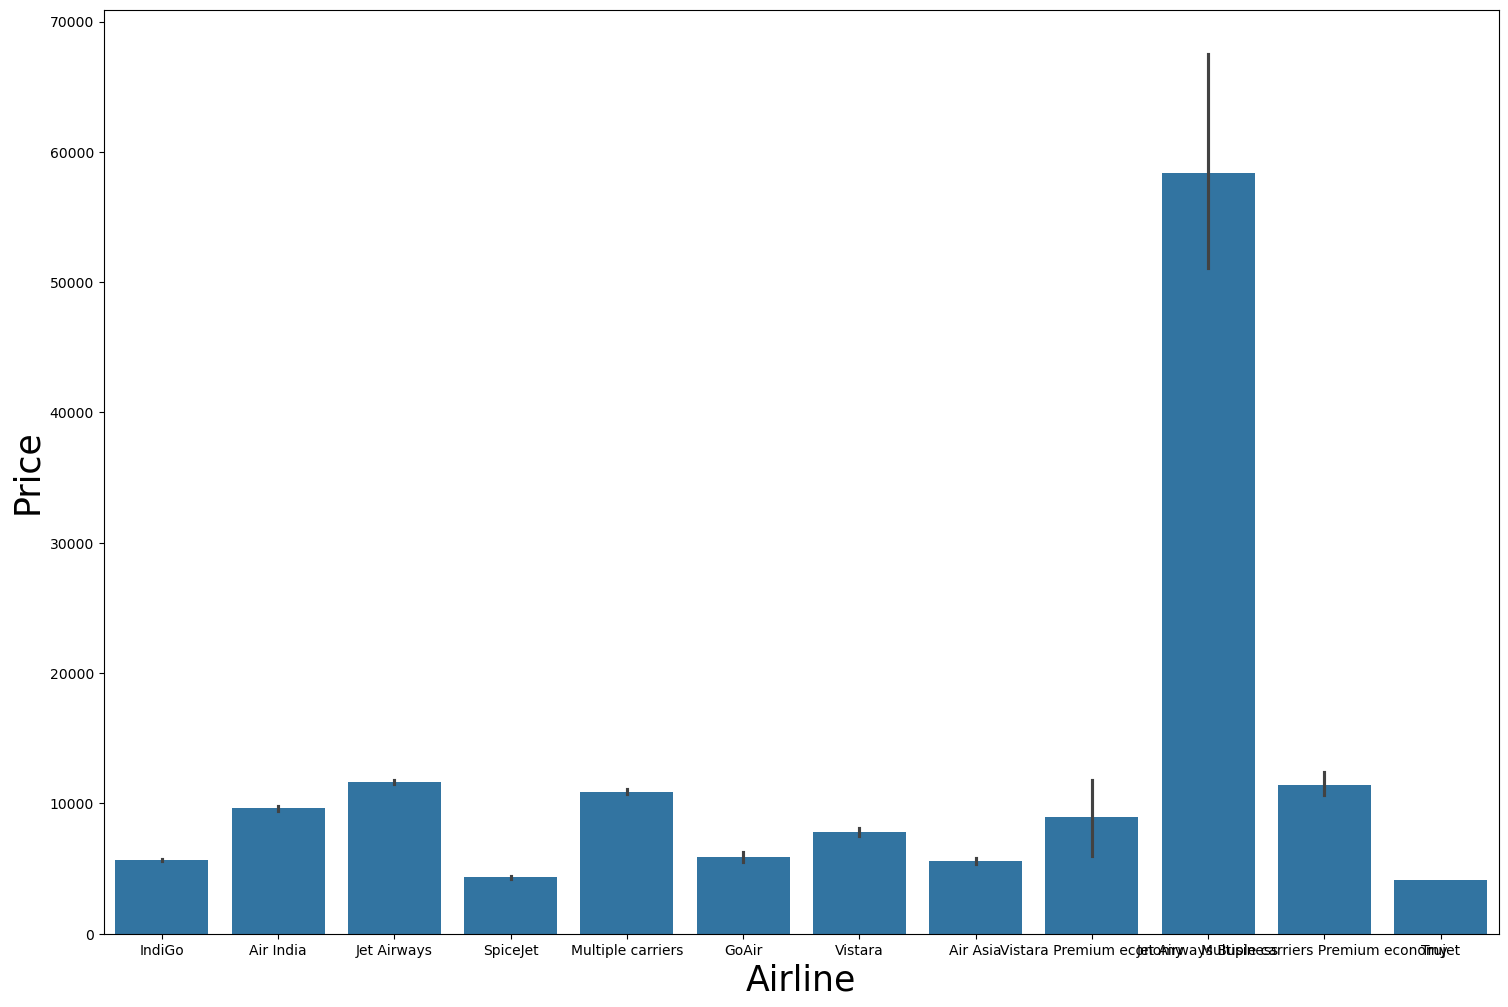

In [150]:
plt.figure(figsize=(18,12))
sns.barplot(x='Airline',y='Price',data=df)
plt.xlabel('Airline',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.xticks()

## Convert to Numerical into Categorical Columns:

In [59]:
df.max()

Airline            Vistara Premium economy
Date_of_Journey                  9/06/2019
Source                              Mumbai
Destination                      New Delhi
Route                            MAA → CCU
Dep_Time                             23:55
Arrival_Time                  23:55 02 Mar
Duration                             9h 5m
Total_Stops                       non-stop
Additional_Info             Red-eye flight
Price                                79512
dtype: object

In [60]:
df.min()

Airline                   Air Asia
Date_of_Journey         01/03/2019
Source                    Banglore
Destination               Banglore
Route              BLR → AMD → DEL
Dep_Time                     00:20
Arrival_Time          00:05 02 Apr
Duration                       10h
Total_Stops                 1 stop
Additional_Info     1 Long layover
Price                         1759
dtype: object

In [61]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [154]:
df.select_dtypes(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [62]:
df['Date_of_Journey'].str

In [63]:
df['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [64]:
df['Journey_day']=df['Date_of_Journey'].str.split('/').str[0]
df['Journey_day']

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Journey_day, Length: 10683, dtype: object

In [65]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1


In [66]:
df['Journey_month']=df['Date_of_Journey'].str.split('/').str[1]
df['Journey_month']

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Journey_month, Length: 10683, dtype: object

In [67]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


In [68]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [69]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


# Imputations:

###  IQR Methods :

In [70]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
q=q3-q1
uplimit=q3+(1.5*q)
lowlimit=q1-(1.5*q)
print(uplimit,lowlimit,q)

23017.0 -5367.0 7096.0


In [71]:
df['Price'].value_counts().sort_values()

Price
12648      1
11265      1
12954      1
15957      1
9601       1
        ... 
4823     131
4804     160
7229     162
10844    212
10262    258
Name: count, Length: 1870, dtype: int64

In [72]:
df.loc[df.Price>50000,'Price'].value_counts().sum()


8

In [73]:
df.Price.std()

4611.3591668171175

In [74]:
df.Price.mean()

9087.064120565385

In [75]:
df.Price.quantile(0.75)

12373.0

In [76]:
df.Price.quantile(0.25)

5277.0

In [79]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


<Axes: xlabel='Price', ylabel='Count'>

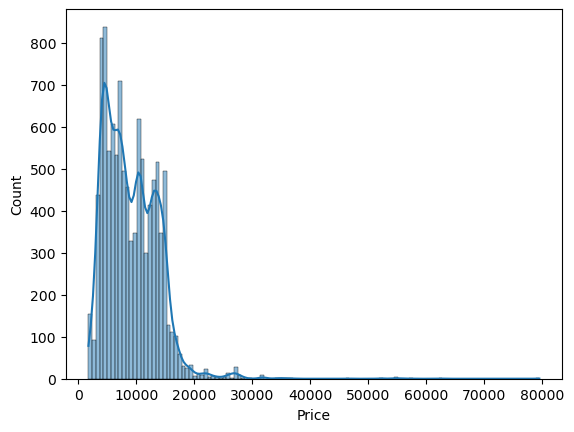

In [173]:
sns.histplot(x='Price',data=df,kde=True)

## Domain Analaysis :
* The Price feature's are Positive Skew distributions.

In [174]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


In [80]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

In [81]:
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [82]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,5,50


In [83]:
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [84]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,5,50,13,15


In [85]:
df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [86]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10


In [87]:
df.select_dtypes(include='O')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,01,03
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,9,04
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,04
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,27,04
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,01,03


In [88]:
df['duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [89]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10,170


In [90]:
df.drop(['Duration'],axis=1,inplace=True)

In [91]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,170


## Category into Numerical :

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
enc=LabelEncoder()

In [94]:
df['Airline']=enc.fit_transform(df['Airline'])
df['Source']=enc.fit_transform(df['Source'])
df['Destination']=enc.fit_transform(df['Destination'])
df['Route']=enc.fit_transform(df['Route'])
df['Total_Stops']=enc.fit_transform(df['Total_Stops'])


In [95]:
df['Additional_Info']=enc.fit_transform(df['Additional_Info'])

In [96]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
0,3,0,5,18,4,8,3897,24,03,22,20,1,10,170


## Check the Correlations :

<Axes: >

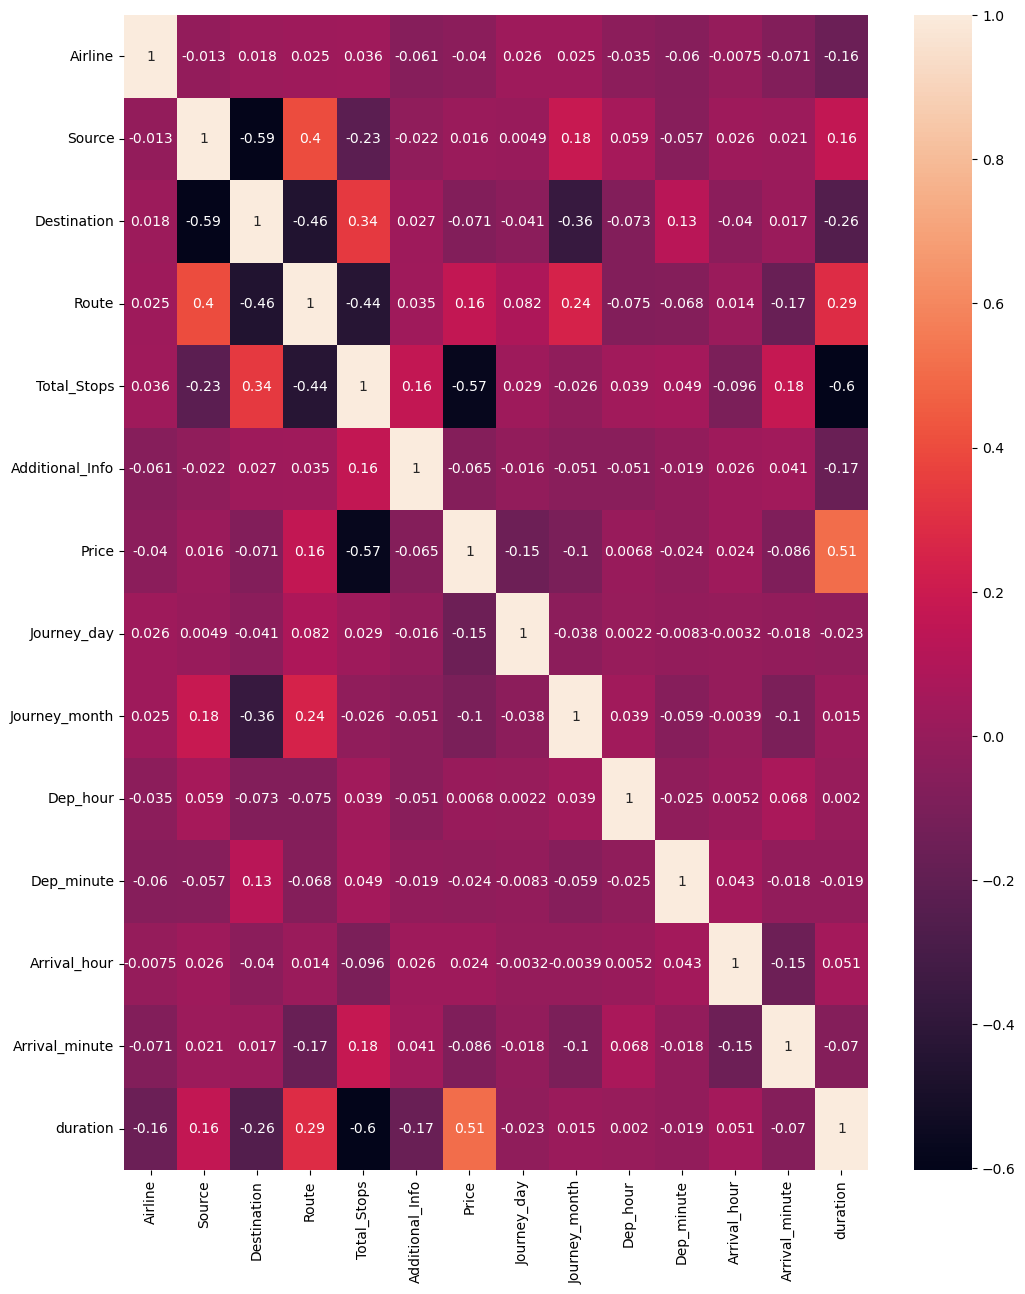

In [192]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(),annot=True)

In [193]:
max_corr=abs(df.corr())
max_corr

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
Airline,1.000000,0.013401,0.018479,0.025118,0.036064,0.060802,0.039520,0.026238,0.024643,0.035194,0.060044,0.007491,0.071089,0.159803
Source,0.013401,1.000000,0.592574,0.403403,0.225601,0.022107,0.015998,0.004898,0.183268,0.059044,0.056991,0.025632,0.021040,0.161874
Destination,0.018479,0.592574,1.000000,0.461183,0.337883,0.026806,0.071112,0.040998,0.364686,0.072979,0.127892,0.039710,0.017196,0.257365
Route,0.025118,0.403403,0.461183,1.000000,0.437783,0.035188,0.164118,0.081560,0.244196,0.075044,0.067984,0.013851,0.173345,0.288846
Total_Stops,0.036064,0.225601,0.337883,0.437783,1.000000,0.164009,0.571174,0.029290,0.026346,0.039268,0.048813,0.095598,0.175973,0.602313
Additional_Info,0.060802,0.022107,0.026806,0.035188,0.164009,1.000000,0.065478,0.016337,0.051478,0.051010,0.019339,0.026173,0.041311,0.167778
Price,0.039520,0.015998,0.071112,0.164118,0.571174,0.065478,1.000000,0.153738,0.103651,0.006819,0.024492,0.024264,0.086155,0.506371
Journey_day,0.026238,0.004898,0.040998,0.081560,0.029290,0.016337,0.153738,1.000000,0.038378,0.002220,0.008261,0.003192,0.017511,0.022562
Journey_month,0.024643,0.183268,0.364686,0.244196,0.026346,0.051478,0.103651,0.038378,1.000000,0.039112,0.059238,0.003941,0.100626,0.014870
Dep_hour,0.035194,0.059044,0.072979,0.075044,0.039268,0.051010,0.006819,0.002220,0.039112,1.000000,0.024806,0.005215,0.067909,0.002001


In [194]:
corr=df.corr()
corr

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
Airline,1.000000,-0.013401,0.018479,0.025118,0.036064,-0.060802,-0.039520,0.026238,0.024643,-0.035194,-0.060044,-0.007491,-0.071089,-0.159803
Source,-0.013401,1.000000,-0.592574,0.403403,-0.225601,-0.022107,0.015998,0.004898,0.183268,0.059044,-0.056991,0.025632,0.021040,0.161874
Destination,0.018479,-0.592574,1.000000,-0.461183,0.337883,0.026806,-0.071112,-0.040998,-0.364686,-0.072979,0.127892,-0.039710,0.017196,-0.257365
Route,0.025118,0.403403,-0.461183,1.000000,-0.437783,0.035188,0.164118,0.081560,0.244196,-0.075044,-0.067984,0.013851,-0.173345,0.288846
Total_Stops,0.036064,-0.225601,0.337883,-0.437783,1.000000,0.164009,-0.571174,0.029290,-0.026346,0.039268,0.048813,-0.095598,0.175973,-0.602313
Additional_Info,-0.060802,-0.022107,0.026806,0.035188,0.164009,1.000000,-0.065478,-0.016337,-0.051478,-0.051010,-0.019339,0.026173,0.041311,-0.167778
Price,-0.039520,0.015998,-0.071112,0.164118,-0.571174,-0.065478,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.506371
Journey_day,0.026238,0.004898,-0.040998,0.081560,0.029290,-0.016337,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022562
Journey_month,0.024643,0.183268,-0.364686,0.244196,-0.026346,-0.051478,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.014870
Dep_hour,-0.035194,0.059044,-0.072979,-0.075044,0.039268,-0.051010,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.002001


In [195]:
for i in corr:
    high_cor=corr.loc[abs(corr[i])>0.55]
    for j in high_cor.index:
        if i!=j:
            print(i)
            

Source
Destination
Total_Stops
Total_Stops
Price
duration


## Feature Scaling :

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration'],
      dtype='object')

In [99]:
scaler=StandardScaler()
dd=df.drop(['Price'],axis=1)
scale=scaler.fit_transform(dd)
scale

array([[-0.41067545, -1.65844074,  2.41666505, ..., -1.80042732,
        -0.8900573 , -0.93158255],
       [-1.26099927,  0.89005213, -0.97382594, ..., -0.0508512 ,
        -0.58712363, -0.39007152],
       [ 0.01448647,  0.04055451, -0.29572775, ..., -1.36303329,
         0.01874372,  0.97847452],
       ...,
       [ 0.01448647, -1.65844074,  0.38237045, ..., -0.34244722,
        -0.28418995, -0.91189124],
       [ 2.56545795, -1.65844074,  2.41666505, ...,  0.09494681,
        -0.8900573 , -0.95127386],
       [-1.26099927,  0.04055451, -0.29572775, ...,  0.82393686,
        -0.58712363, -0.28176932]])

In [100]:
data=pd.DataFrame(scale,columns=dd.columns)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
0,-0.410675,-1.658441,2.416665,-1.547183,1.407309,0.499892,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931583
1,-1.260999,0.890052,-0.973826,0.249876,-0.253632,0.499892,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390072
2,0.014486,0.040555,-0.295728,1.175633,-0.253632,0.499892,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.978475
3,-0.410675,0.890052,-0.973826,0.440473,-0.807278,0.499892,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.626367
4,-0.410675,-1.658441,2.416665,-1.247673,-0.807278,0.499892,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.705132


In [101]:
dd1=df.Price
dd2=dd1/1000
dd2

0         3.897
1         7.662
2        13.882
3         6.218
4        13.302
          ...  
10678     4.107
10679     4.145
10680     7.229
10681    12.648
10682    11.753
Name: Price, Length: 10683, dtype: float64

In [102]:
data1=pd.concat([data,dd2],axis=1)
data1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration,Price
0,-0.410675,-1.658441,2.416665,-1.547183,1.407309,0.499892,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931583,3.897
1,-1.260999,0.890052,-0.973826,0.249876,-0.253632,0.499892,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390072,7.662
2,0.014486,0.040555,-0.295728,1.175633,-0.253632,0.499892,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.978475,13.882
3,-0.410675,0.890052,-0.973826,0.440473,-0.807278,0.499892,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.626367,6.218
4,-0.410675,-1.658441,2.416665,-1.247673,-0.807278,0.499892,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.705132,13.302


## Split the data :

In [103]:
X=data1.loc[:,:'duration']
X
            

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration
0,-0.410675,-1.658441,2.416665,-1.547183,1.407309,0.499892,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931583
1,-1.260999,0.890052,-0.973826,0.249876,-0.253632,0.499892,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390072
2,0.014486,0.040555,-0.295728,1.175633,-0.253632,0.499892,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.978475
3,-0.410675,0.890052,-0.973826,0.440473,-0.807278,0.499892,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.626367
4,-0.410675,-1.658441,2.416665,-1.247673,-0.807278,0.499892,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.705132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.686161,0.890052,-0.973826,-0.294688,1.407309,0.499892,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-0.970965
10679,-1.260999,0.890052,-0.973826,-0.294688,1.407309,0.499892,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-0.961120
10680,0.014486,-1.658441,0.382370,-1.547183,1.407309,0.499892,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,-0.911891
10681,2.565458,-1.658441,2.416665,-1.547183,1.407309,0.499892,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,-0.951274


In [104]:
X.shape

(10683, 13)

In [105]:
data1.shape

(10683, 14)

In [106]:
y=data1.Price
y

0         3.897
1         7.662
2        13.882
3         6.218
4        13.302
          ...  
10678     4.107
10679     4.145
10680     7.229
10681    12.648
10682    11.753
Name: Price, Length: 10683, dtype: float64

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8546, 13)
(2137, 13)
(8546,)
(2137,)


## Linear Model:

In [111]:
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [227]:
y_pred_linear=model_linear.predict(X_test)
y_pred_linear

array([12.29094596,  3.97530523, 10.02608824, ..., 12.49616427,
        9.91028258, 11.20155224])

## Evaluate the Metrics:

In [229]:
r2_linear=r2_score(y_test,y_pred_linear)
r2_linear

0.43382048587837396

In [230]:
absolute_linear=mean_absolute_error(y_test,y_pred_linear)
absolute_linear

2.4663481910909164

In [231]:
squared_linear=mean_squared_error(y_test,y_pred_linear)
squared_linear

11.079200959872992

## Random Forest :

In [222]:
model_random=RandomForestRegressor(random_state=42)
model_random.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [223]:
y_pred_random=model_random.predict(X_test)
y_pred_random

array([ 7.34406,  4.91611, 14.80035, ..., 10.55531, 13.11324, 16.04525])

In [233]:
random_r2score=r2_score(y_test,y_pred_random)
print('r2_random :',random_r2score)

random_mean_absolute_error=mean_absolute_error(y_test,y_pred_random)
print('absolute_random :',random_mean_absolute_error)


random_mean_squared_error=mean_squared_error(y_test,y_pred_random)
print('squared_random :',random_mean_squared_error)

r2_random : 0.8945514967386408
absolute_random : 0.63788991016185
squared_random : 2.0634536033379893


In [280]:
r2_random=r2_score(y_test,y_pred_random)
r2_random

0.8945514967386408

In [289]:
squared_random=mean_squared_error(y_test,y_pred_random)
squared_random

2.0634536033379893

## Random Forest Hyper Parameter Tuning :

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [234]:
params_random={'max_depth':list(range(10)),
               'min_samples_split':list(range(10)),
               'min_samples_leaf':list(range(10)),
               'max_leaf_nodes':list(range(10))
               }

## RandomizedSearchCV :

In [235]:
randomsearch_random=RandomizedSearchCV(model_random,params_random,verbose=1,cv=5,scoring='r2')
randomsearch_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9]},
                   scoring='r2', verbose=1)

In [236]:
randomsearch_random.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 7,
 'max_depth': 7}

In [237]:
random_hyperparameter_2=RandomForestRegressor(min_samples_leaf=5,min_samples_split=3,max_leaf_nodes=7,
                                             max_depth=7)
random_hyperparameter_2.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_leaf_nodes=7, min_samples_leaf=5,
                      min_samples_split=3)

In [238]:
y_pred_random_hyper_2=random_hyperparameter_2.predict(X_test)
y_pred_random_hyper_2

array([ 6.56755886,  5.22483144, 13.91712824, ..., 11.14889741,
       13.85991126, 13.85991126])

In [239]:
r2_random_hyper=r2_score(y_test,y_pred_random_hyper_2)
r2_random_hyper

0.6472421412384686

In [240]:
absolute_random_hyper=mean_absolute_error(y_test,y_pred_random_hyper_2)
absolute_random_hyper

1.7904410715377717

In [241]:
squared_random_hyper=mean_squared_error(y_test,y_pred_random_hyper_2)
squared_random_hyper

6.902890531913399

## ANN :

In [213]:
from sklearn.neural_network import MLPRegressor

In [215]:
model_ann=MLPRegressor(random_state=42)
model_ann.fit(X_train,y_train)

MLPRegressor(random_state=42)

In [216]:
y_pred_ann=model_ann.predict(X_test)
y_pred_ann

array([10.3224189 ,  4.61004561, 14.25913613, ..., 13.71588517,
       13.73048456, 15.11726624])

In [217]:
r2_ann=r2_score(y_test,y_pred_ann)
r2_ann

0.7819259124273268

In [218]:
absolute_ann=mean_absolute_error(y_test,y_pred_ann)
absolute_ann

1.3308460259368238

In [220]:
squared_ann=mean_squared_error(y_test,y_pred_ann)
squared_ann

4.267350866812829

## Decision Tree :

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [208]:
model_decision=DecisionTreeRegressor(random_state=20)
model_decision.fit(X_train,y_train)

DecisionTreeRegressor(random_state=20)

In [209]:
y_pred_decision=model_decision.predict(X_test)
y_pred_decision

array([ 7.166,  4.174, 15.339, ...,  7.905, 12.692, 16.079])

In [210]:
r2_decision=r2_score(y_test,y_pred_decision)
r2_decision

0.8596627908483608

In [211]:
absolute_decision_hyper=mean_absolute_error(y_test,y_pred_decision)
absolute_decision_hyper

0.6718595772890348

In [212]:
squared_decision_hyper=mean_squared_error(y_test,y_pred_decision)
squared_decision_hyper

2.746168138476187

## Decision Tree Hyper parameter Tunings: 

In [242]:
params_decision={'max_depth':list(range(10)),
               'min_samples_split':list(range(10)),
               'min_samples_leaf':list(range(10)),
               'max_leaf_nodes':list(range(10))
               }

## RandomizedSearchCv in Decision Tree : 

In [243]:
random_search_decision=RandomizedSearchCV(model_decision,params_decision,verbose=1,cv=5,scoring='r2')
random_search_decision.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=20),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9]},
                   scoring='r2', verbose=1)

In [244]:
random_search_decision.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 9,
 'max_depth': 9}

In [245]:
model_decision_hyper_2=DecisionTreeRegressor(min_samples_leaf=3,min_samples_split=8,max_leaf_nodes=9,
                                            max_depth=9)
model_decision_hyper_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=9, min_samples_leaf=3,
                      min_samples_split=8)

In [246]:
y_pred_decision_hyper_random=model_decision_hyper_2.predict(X_test)
y_pred_decision_hyper_random

array([ 8.40797251,  5.04788049, 14.36100632, ..., 10.64741697,
       14.36100632, 14.36100632])

In [247]:
r2_decision_hyper=r2_score(y_test,y_pred_decision_hyper_random)
r2_decision_hyper

0.6522636457284368

In [248]:
absolute_decision_hyper=mean_absolute_error(y_test,y_pred_decision_hyper_random)
absolute_decision_hyper

1.7763030798078039

In [249]:
squared_decision_hyper=mean_squared_error(y_test,y_pred_decision_hyper_random)
squared_decision_hyper

6.8046279562149925

## SVM :

In [177]:
from sklearn.svm import SVR

In [178]:
model_svm=SVR()
model_svm.fit(X_train,y_train)

SVR()

In [179]:
y_pred_svm=model_svm.predict(X_test)
y_pred_svm

array([10.17409576,  4.83738193, 14.15338497, ..., 14.40171775,
       13.25807529, 13.8808082 ])

In [180]:
r2_svm=r2_score(y_test,y_pred_svm)
r2_svm

0.6812110015729476

In [181]:
absolute_svm=mean_absolute_error(y_test,y_pred_svm)
absolute_svm

1.4929698694401292

In [182]:
squared_svm=mean_squared_error(y_test,y_pred_svm)
squared_svm

6.238175859911499

## SVM Hyper parameters :

In [250]:
params_svm={'kernel':['rbf','linear', 'poly','sigmoid'],
            'degree':list(range(10)),
            'gamma':['scale','auto'],
            'C':list(range(10))
           }

## RandomizedSearchCv - SVM :

In [251]:
randomsearch_svm=RandomizedSearchCV(model_svm,params_svm,verbose=1,cv=3,scoring='r2')
randomsearch_svm.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='r2', verbose=1)

In [252]:
randomsearch_svm.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 9}

In [254]:
model_svm_hyper_2=SVR(kernel='rbf',gamma='scale',degree=4,C=9)
model_svm_hyper_2.fit(X_train,y_train)

SVR(C=9, degree=4)

In [255]:
y_pred_svm_hyper_2=model_svm_hyper_2.predict(X_test)
y_pred_svm_hyper_2

array([ 8.97825308,  4.7414718 , 13.60952221, ..., 13.84438784,
       13.61043433, 15.27934877])

In [256]:
r2_svm_hyper=r2_score(y_test,y_pred_svm_hyper_2)
r2_svm_hyper

0.7705510455810308

In [257]:
absolute_svm_hyper=mean_absolute_error(y_test,y_pred_svm_hyper_2)
absolute_svm_hyper

1.174570354821079

In [258]:
squared_svm_hyper=mean_squared_error(y_test,y_pred_svm_hyper_2)
squared_svm_hyper

4.489938283945759

## XGBoost algorithms:

In [167]:
from xgboost import XGBRegressor

In [168]:
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [169]:
y_pred_xgb=model_xgb.predict(X_test)
y_pred_xgb

array([ 8.521595 ,  4.5946617, 13.834299 , ..., 10.649727 , 13.228805 ,
       15.972041 ], dtype=float32)

In [174]:
r2_xgb=r2_score(y_test,y_pred_xgb)
r2_xgb

0.8960268969552122

In [175]:
absolute_xgb=mean_absolute_error(y_test,y_pred_xgb)
absolute_xgb

0.7194051774354756

In [176]:
squared_xgb=mean_squared_error(y_test,y_pred_xgb)
squared_xgb

2.0345824501296397

## XGBoost Hyper Parameters:

In [259]:
params_xgboost={'max_depth':list(range(10)),
               'min_samples_split':list(range(10)),
               'min_samples_leaf':list(range(10)),
               'max_leaf_nodes':list(range(10))}

In [260]:
gridsearch_xgboost=RandomizedSearchCV(model_xgb,params_xgboost,verbose=1,cv=3,scoring='r2')
gridsearch_xgboost.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9]},
                   scoring='r2', verbose=1)

In [261]:
gridsearch_xgboost.best_params_

{'min_samples_split': 1,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 8,
 'max_depth': 6}

In [262]:
model_xgb_hyper=XGBRegressor(min_samples_split=1,min_samples_leaf=8,max_leaf_nodes=8,
                            max_depth=6)
model_xgb_hyper.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaf_nodes=8,
             max_leaves=None, min_child_weight=None, min_samples_leaf=8,
             min_samples_split=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, ...)

In [263]:
y_pred_xgb_hyper=model_xgb_hyper.predict(X_test)
y_pred_xgb_hyper

array([ 8.521595 ,  4.5946617, 13.834299 , ..., 10.649727 , 13.228805 ,
       15.972041 ], dtype=float32)

In [267]:
r2_xgb_hyper=r2_score(y_test,y_pred_xgb_hyper)
r2_xgb_hyper

0.8960268969552122

In [268]:
absolute_xgb=mean_absolute_error(y_test,y_pred_xgb_hyper)
absolute_xgb

0.7194051774354756

In [288]:
squared_xgb_hyper=mean_squared_error(y_test,y_pred_xgb_hyper)
squared_xgb_hyper

2.0345824501296397

## Ridge :

In [155]:
from sklearn.linear_model import Ridge

In [162]:
model_ridge=Ridge(random_state=42)## these is worst model r2 score in this datasets.
model_ridge.fit(X_train,y_train)

Ridge(random_state=42)

In [163]:
y_pred_ridge=model_ridge.predict(X_test)
y_pred_ridge

array([12.29018264,  3.97590911, 10.0260418 , ..., 12.49600958,
        9.91011675, 11.20141097])

In [164]:
r2_score(y_test,y_pred_ridge)     ## these is worst model in this datasets.

0.43382305025580636

In [165]:
mean_absolute_error(y_test,y_pred_ridge)

2.4663376529382015

In [166]:
mean_squared_error(y_test,y_pred_ridge)

11.079150779228511

## Bagging Regression :

In [144]:
from sklearn.ensemble import BaggingRegressor

In [145]:
model_bagging=BaggingRegressor(random_state=42)
model_bagging.fit(X_train,y_train)

BaggingRegressor(random_state=42)

In [146]:
y_pred_bagging=model_bagging.predict(X_test)
y_pred_bagging

array([ 7.2594,  5.014 , 14.4791, ..., 10.3751, 13.271 , 16.0265])

In [147]:
r2_bagging=r2_score(y_test,y_pred_bagging)
r2_bagging

0.8778200564612167

In [148]:
absolute_bagging=mean_absolute_error(y_test,y_pred_bagging)
absolute_bagging

0.679134050404439

In [149]:
squared_bagging=mean_squared_error(y_test,y_pred_bagging)
squared_bagging

2.3908603437059788

## CNN algorithms use the Regressions :

In [133]:
from keras.models import Sequential

In [131]:
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [134]:
model=Sequential([
    Dense(13,activation='relu'),
    Dense(26,activation='relu'),
    Dense(1)
])


In [135]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['r2_score'])

In [136]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
history = model.fit(X_train, y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=0)

In [138]:
history

In [140]:
y_pred_ann=model.predict(X_test)
y_pred_ann

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 9.946517],
       [ 5.465149],
       [14.588351],
       ...,
       [16.448572],
       [13.603345],
       [15.00622 ]], dtype=float32)

In [141]:
r2_cnn=r2_score(y_test,y_pred_cnn)
r2_cnn

0.7904305909590457

In [142]:
absolute_cnn=mean_absolute_error(y_test,y_pred_cnn)
absolute_cnn

1.2972848534231494

In [143]:
squared_cnn=mean_squared_error(y_test,y_pred_cnn)
squared_cnn

4.100928309652295

## ExtraTreesRegressor :

In [121]:
from sklearn.ensemble import ExtraTreesRegressor

In [150]:
model_extra=ExtraTreesRegressor(random_state=42)
model_extra.fit(X_train,y_train)

ExtraTreesRegressor(random_state=42)

In [151]:
y_pred_extra=model_extra.predict(X_test)
y_pred_extra

array([ 7.04469,  4.88219, 15.339  , ..., 11.40443, 12.90908, 16.0832 ])

In [152]:
r2_Extra_tree=r2_score(y_test,y_pred_extra)
r2_Extra_tree

0.902260836620461

In [153]:
Extratree_absolute_error=mean_absolute_error(y_test,y_pred_extra)
Extratree_absolute_error

0.5879557958976774

In [287]:
squared_extra=mean_squared_error(y_test,y_pred_extra)
squared_extra

1.9125945141475944

## Extra Tree Hyper parameters :

In [270]:
params_extratree={'max_depth':list(range(10)),
               'min_samples_split':list(range(10)),
               'min_samples_leaf':list(range(10)),
               'max_leaf_nodes':list(range(10))
               }

In [271]:
randomsearch_extratree=RandomizedSearchCV(model_random,params_extratree,verbose=1,cv=5,scoring='r2')
randomsearch_extratree.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9]},
                   scoring='r2', verbose=1)

In [272]:
randomsearch_extratree.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 9,
 'max_depth': 8}

In [273]:
model_extra=ExtraTreesRegressor(min_samples_leaf=1,min_samples_split=7,max_depth=8,max_leaf_nodes=9)
model_extra.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=8, max_leaf_nodes=9, min_samples_split=7)

In [274]:
y_pred_extra_hyper=model_extra.predict(X_test)
y_pred_extra_hyper

array([11.06504836,  5.05060986, 12.6025134 , ..., 11.17564914,
       10.97521672, 11.0135658 ])

In [275]:
r2_score(y_test,y_pred_extra_hyper)

0.6040561700754211

In [278]:
absolute_extra_hyper=mean_absolute_error(y_test,y_pred_extra_hyper)
absolute_extra_hyper

2.0648451171035234

In [279]:
squared_extra_hyper=mean_squared_error(y_test,y_pred_extra_hyper)
squared_extra_hyper

7.747968888209947

## Visualize the r2 scores :

In [306]:
scores={'r2_linear':43,'r2_random':89,'r2_decision':85,'r2_decision_hyper':65,'r2_ann':78,
        'r2_cnn':79,'r2_bagging':87,'r2_Extra_tree':90,'r2_svm':68,'r2_svm_hyper':77,
       'r2_xgb':89,'r2_xgb_hyper':89,'r2_random_hyper':69}
keys=scores.keys()
values=scores.values()

Text(0.5, 1.0, 'r2_scores')

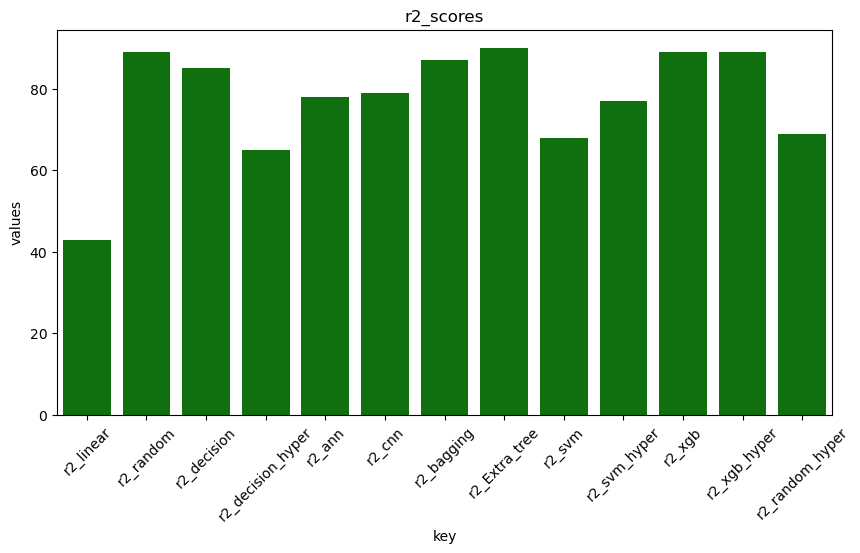

In [307]:
plt.figure(figsize=(10,5))
sns.barplot(x=keys,y=values,color='green')
plt.xlabel('key')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.title('r2_scores')

Text(0.5, 1.0, 'r2_scores')

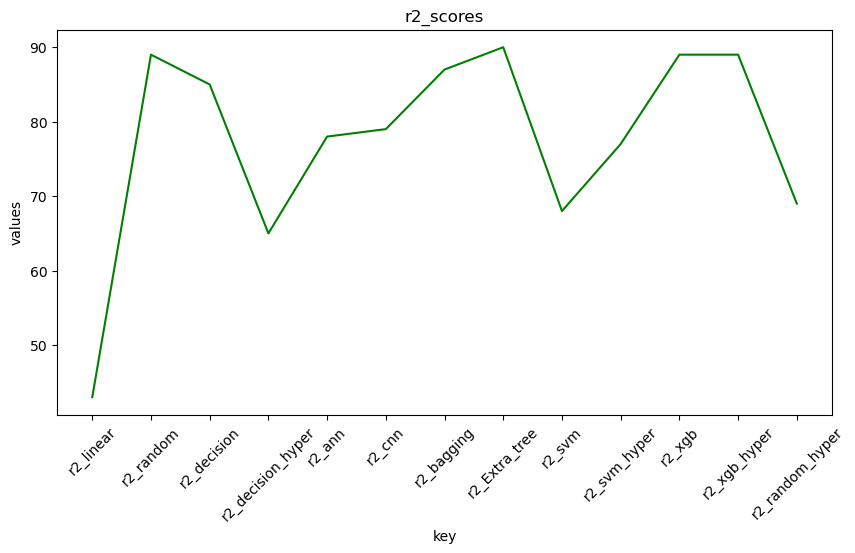

In [308]:
plt.figure(figsize=(10,5))
sns.lineplot(x=keys,y=values,color='green')
plt.xlabel('key')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.title('r2_scores')

## Visalize the losses :

In [314]:
scores={'sqaured_ann':4.26,'squared_bagging':2.39,'squared_cnn':4.10,'squared_decision_hyper':6.80,
        'squared_extra_hyper':7.74,'squared_linear':11.00,'squared_random_hyper':6.90,
        'squared_svm':6.23,
        'squared_svm_hyper':4.48,'squared_xgb':2.03,'squared_extra':1.91,'squared_xgb_hyper':2.03,
       'squared_random':2.04}
keys=scores.keys()
values=scores.values()

In [298]:
keys=scores.keys()
keys

dict_keys(['sqaured_ann', 'squared_bagging', 'squared_cnn', 'squared_decision_hyper', 'squared_extra_hyper', 'squared_linear', 'squared_random_hyper', 'squared_svm', 'squared_svm_hyper', 'squared_xgb', 'squared_extra', 'squared_xgb_hyper', 'squared_random'])

In [311]:
values=scores.values()
values

dict_values([43, 89, 85, 65, 78, 79, 87, 90, 68, 77, 89, 89, 69])

Text(0.5, 1.0, 'squared losses')

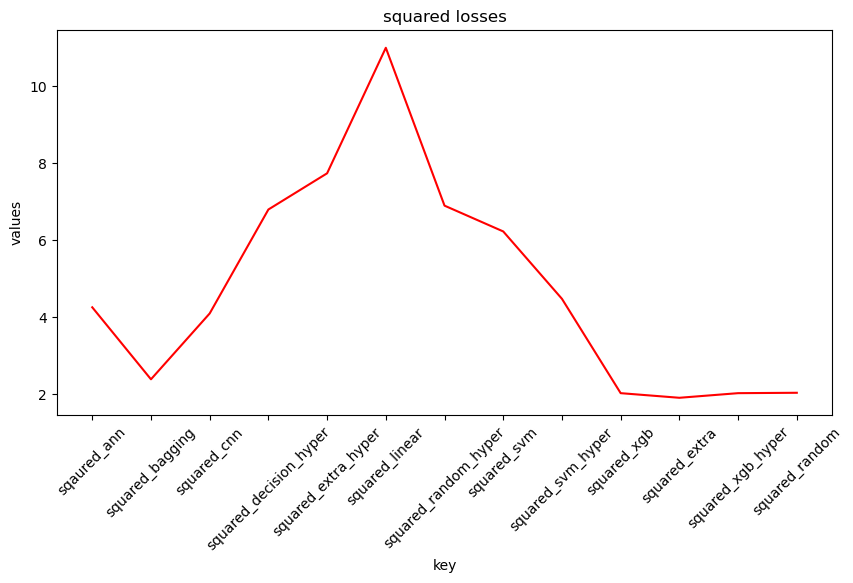

In [315]:
plt.figure(figsize=(10,5))
sns.lineplot(x=keys,y=values,color='red')
plt.xlabel('key')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.title('squared losses')

Text(0.5, 1.0, 'squared losses')

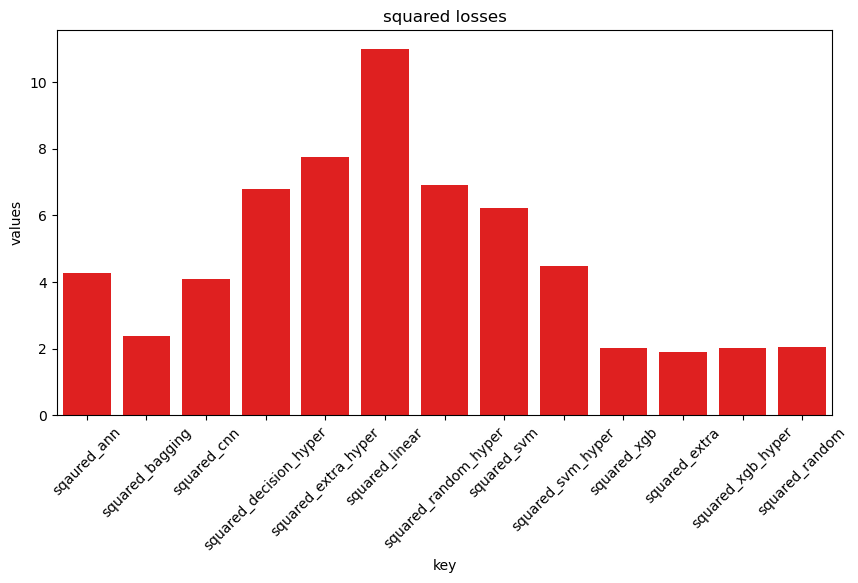

In [305]:
plt.figure(figsize=(10,5))
sns.barplot(x=keys,y=values,color='red')
plt.xlabel('key')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.title('squared losses')

## Conclusion : 

* The Flight fare predictions highest r2_score 90% on Extratree Ensemble algorithms.this is a tree based algorithms.

* The Flight fare predictions highest mean_squared_error 11% linear regression algorithms.
* We have train the models above 50% of r2 score algorithms to be used.